In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install datasets
!pip install pandas
import pandas as pd
from datasets import load_dataset, Image, Dataset, DatasetDict

df_train = pd.read_csv("/content/gdrive/MyDrive/asub_dataset/preprocessed_newest/train.csv")
df_valid = pd.read_csv("/content/gdrive/MyDrive/asub_dataset/preprocessed_newest/validation.csv")
df_test = pd.read_csv("/content/gdrive/MyDrive/asub_dataset/preprocessed_newest/test.csv")

train = Dataset.from_pandas(df_train).cast_column("path", Image()).rename_column("path", "image")
valid = Dataset.from_pandas(df_valid).cast_column("path", Image()).rename_column("path", "image")
test = Dataset.from_pandas(df_test).cast_column("path", Image()).rename_column("path", "image")

dataset = DatasetDict()

dataset['train'] = train
dataset['valid'] = valid
dataset['test'] = test

#def process(example):
#  example['lbl'] = "no cancer" if example["label"] == 0 else "cancer"
#  return example

#dataset = dataset.map(process)
dataset = dataset.rename_column("label", "labels")
dataset = dataset.class_encode_column("labels")
dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 452 kB 13.3 MB/s 
     |████████████████████████████████| 213 kB 73.8 MB/s 
     |████████████████████████████████| 132 kB 69.6 MB/s 
     |████████████████████████████████| 182 kB 73.4 MB/s 
     |████████████████████████████████| 127 kB 79.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Stringifying the column:   0%|          | 0/2 [00:00<?, ?ba/s]

Casting to class labels:   0%|          | 0/2 [00:00<?, ?ba/s]

Stringifying the column:   0%|          | 0/1 [00:00<?, ?ba/s]

Casting to class labels:   0%|          | 0/1 [00:00<?, ?ba/s]

Stringifying the column:   0%|          | 0/1 [00:00<?, ?ba/s]

Casting to class labels:   0%|          | 0/1 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['labels', 'image'],
        num_rows: 1920
    })
    valid: Dataset({
        features: ['labels', 'image'],
        num_rows: 480
    })
    test: Dataset({
        features: ['labels', 'image'],
        num_rows: 600
    })
})

In [3]:
dataset['train'][0:5]

{'labels': [1, 0, 1, 0, 0],
 'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x7F1F95836EE0>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x7F1F8A1C4EE0>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x7F1F8A17C910>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x7F1F958364F0>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x7F1F8A17C9D0>]}

In [4]:
dataset['train'].features['labels']

ClassLabel(names=['0', '1'], id=None)

In [5]:
!pip install transformers
from transformers import ViTFeatureExtractor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)
feature_extractor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 14.8 MB/s 
     |████████████████████████████████| 7.6 MB 41.8 MB/s 


Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [6]:
def process_example(example):
    inputs = feature_extractor(example['image'], return_tensors='pt')
    inputs['labels'] = example['labels']
    return inputs

process_example(dataset['train'][0])

{'pixel_values': tensor([[[[-0.9686, -0.9686, -0.9686,  ..., -0.9686, -0.9686, -0.9686],
          [-0.9686, -0.9686, -0.9686,  ..., -0.9686, -0.9686, -0.9686],
          [-0.9686, -0.9686, -0.9686,  ..., -0.9686, -0.9686, -0.9686],
          ...,
          [-0.9686, -0.9686, -0.9686,  ..., -0.9608, -0.9608, -0.9608],
          [-0.9686, -0.9686, -0.9686,  ..., -0.9608, -0.9608, -0.9608],
          [-0.9686, -0.9686, -0.9686,  ..., -0.9608, -0.9608, -0.9608]],

         [[-0.9686, -0.9686, -0.9686,  ..., -0.9686, -0.9686, -0.9686],
          [-0.9686, -0.9686, -0.9686,  ..., -0.9686, -0.9686, -0.9686],
          [-0.9686, -0.9686, -0.9686,  ..., -0.9686, -0.9686, -0.9686],
          ...,
          [-0.9686, -0.9686, -0.9686,  ..., -0.9608, -0.9608, -0.9608],
          [-0.9686, -0.9686, -0.9686,  ..., -0.9608, -0.9608, -0.9608],
          [-0.9686, -0.9686, -0.9686,  ..., -0.9608, -0.9608, -0.9608]],

         [[-0.9686, -0.9686, -0.9686,  ..., -0.9686, -0.9686, -0.9686],
          [-0

In [7]:
def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = feature_extractor([x for x in example_batch['image']], return_tensors='pt')

    # Don't forget to include the labels!
    inputs['labels'] = example_batch['labels']
    return inputs

dataset = dataset.with_transform(transform)

dataset['train'][0:2]

{'pixel_values': tensor([[[[-0.9686, -0.9686, -0.9686,  ..., -0.9686, -0.9686, -0.9686],
          [-0.9686, -0.9686, -0.9686,  ..., -0.9686, -0.9686, -0.9686],
          [-0.9686, -0.9686, -0.9686,  ..., -0.9686, -0.9686, -0.9686],
          ...,
          [-0.9686, -0.9686, -0.9686,  ..., -0.9608, -0.9608, -0.9608],
          [-0.9686, -0.9686, -0.9686,  ..., -0.9608, -0.9608, -0.9608],
          [-0.9686, -0.9686, -0.9686,  ..., -0.9608, -0.9608, -0.9608]],

         [[-0.9686, -0.9686, -0.9686,  ..., -0.9686, -0.9686, -0.9686],
          [-0.9686, -0.9686, -0.9686,  ..., -0.9686, -0.9686, -0.9686],
          [-0.9686, -0.9686, -0.9686,  ..., -0.9686, -0.9686, -0.9686],
          ...,
          [-0.9686, -0.9686, -0.9686,  ..., -0.9608, -0.9608, -0.9608],
          [-0.9686, -0.9686, -0.9686,  ..., -0.9608, -0.9608, -0.9608],
          [-0.9686, -0.9686, -0.9686,  ..., -0.9608, -0.9608, -0.9608]],

         [[-0.9686, -0.9686, -0.9686,  ..., -0.9686, -0.9686, -0.9686],
          [-0

In [8]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
    }

In [9]:
from transformers.trainer_utils import EvalPrediction
import numpy as np
from datasets import load_metric
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

def compute_metrics(eval_pred: EvalPrediction):
  preds = np.argmax(eval_pred.predictions, axis=1)
  return {
    "acc": accuracy_score(eval_pred.label_ids, preds),
    "f1": f1_score(eval_pred.label_ids, preds),
    "precision": precision_score(eval_pred.label_ids, preds),
    "recall": recall_score(eval_pred.label_ids, preds)
    }


In [10]:
from transformers import ViTForImageClassification

labels = dataset['train'].features['labels'].names

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)

Downloading:   0%|          | 0.00/502 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [11]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./vit-training-output",
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=7,
  fp16=True,
  save_steps=60,
  eval_steps=60,
  logging_steps=60,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
)

In [12]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=dataset["train"],
    eval_dataset=dataset["valid"],
    tokenizer=feature_extractor,
)

Using cuda_amp half precision backend


In [13]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 1920
  Num Epochs = 7
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 840
  Number of trainable parameters = 85800194


Step,Training Loss,Validation Loss,Acc,F1,Precision,Recall
60,0.230800,0.084640,0.975000,0.975207,0.991597,0.959350
120,0.080800,0.062826,0.983333,0.983740,0.983740,0.983740
180,0.031900,0.057007,0.989583,0.989775,0.995885,0.983740
240,0.056300,0.170760,0.958333,0.957627,1.000000,0.918699
300,0.032400,0.059896,0.987500,0.987805,0.987805,0.987805
360,0.018300,0.025645,0.995833,0.995935,0.995935,0.995935
420,0.010300,0.023331,0.993750,0.993890,0.995918,0.991870
480,0.001600,0.026349,0.995833,0.995918,1.000000,0.991870
540,0.001300,0.026600,0.995833,0.995918,1.000000,0.991870
600,0.001200,0.026866,0.995833,0.995918,1.000000,0.991870


***** Running Evaluation *****
  Num examples = 480
  Batch size = 8
Saving model checkpoint to ./vit-training-output/checkpoint-60
Configuration saved in ./vit-training-output/checkpoint-60/config.json
Model weights saved in ./vit-training-output/checkpoint-60/pytorch_model.bin
Image processor saved in ./vit-training-output/checkpoint-60/preprocessor_config.json
***** Running Evaluation *****
  Num examples = 480
  Batch size = 8
Saving model checkpoint to ./vit-training-output/checkpoint-120
Configuration saved in ./vit-training-output/checkpoint-120/config.json
Model weights saved in ./vit-training-output/checkpoint-120/pytorch_model.bin
Image processor saved in ./vit-training-output/checkpoint-120/preprocessor_config.json
***** Running Evaluation *****
  Num examples = 480
  Batch size = 8
Saving model checkpoint to ./vit-training-output/checkpoint-180
Configuration saved in ./vit-training-output/checkpoint-180/config.json
Model weights saved in ./vit-training-output/checkpoint-180

***** train metrics *****
  epoch                    =         7.0
  total_flos               = 969965327GF
  train_loss               =      0.0335
  train_runtime            =  0:24:08.27
  train_samples_per_second =        9.28
  train_steps_per_second   =        0.58


In [14]:
metrics = trainer.evaluate(dataset['valid'])
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** Running Evaluation *****
  Num examples = 480
  Batch size = 8


***** eval metrics *****
  epoch                   =        7.0
  eval_acc                =     0.9938
  eval_f1                 =     0.9939
  eval_loss               =     0.0233
  eval_precision          =     0.9959
  eval_recall             =     0.9919
  eval_runtime            = 0:00:05.10
  eval_samples_per_second =     94.028
  eval_steps_per_second   =     11.753


# Neuer Abschnitt

In [21]:
pred_output = trainer.predict(dataset['test'])
trainer.log_metrics("test", pred_output.metrics)
trainer.save_metrics("test", pred_output.metrics)

***** Running Prediction *****
  Num examples = 600
  Batch size = 8


***** test metrics *****
  test_acc                =      0.995
  test_f1                 =     0.9948
  test_loss               =     0.0189
  test_precision          =     0.9965
  test_recall             =      0.993
  test_runtime            = 0:00:06.41
  test_samples_per_second =     93.539
  test_steps_per_second   =     11.692


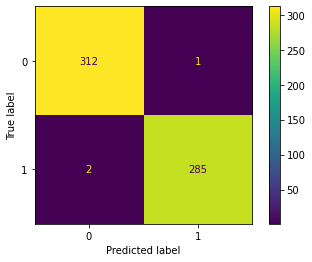

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
preds = np.argmax(pred_output.predictions, axis=1)

disp = ConfusionMatrixDisplay.from_predictions(pred_output.label_ids, preds)

disp